<a href="https://colab.research.google.com/github/prsv1202/DeepLearning/blob/main/GenderRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Some Basic Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# **Importing Data**

In [2]:
data=pd.read_csv('/content/voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
data.shape

(3168, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [5]:
data.describe().T ##### Transpose ####

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,0.180907,0.029918,0.039363,0.163662,0.184838,0.199146,0.251124
sd,3168.0,0.057126,0.016652,0.018363,0.041954,0.059155,0.067020,0.115273
median,3168.0,0.185621,0.036360,0.010975,0.169593,0.190032,0.210618,0.261224
Q25,3168.0,0.140456,0.048680,0.000229,0.111087,0.140286,0.175939,0.247347
Q75,3168.0,0.224765,0.023639,0.042946,0.208747,0.225684,0.243660,0.273469
IQR,3168.0,0.084309,0.042783,0.014558,0.042560,0.094280,0.114175,0.252225
skew,3168.0,3.140168,4.240529,0.141735,1.649569,2.197101,2.931694,34.725453
kurt,3168.0,36.568461,134.928661,2.068455,5.669547,8.318463,13.648905,1309.612887
sp.ent,3168.0,0.895127,0.044980,0.738651,0.861811,0.901767,0.928713,0.981997
sfm,3168.0,0.408216,0.177521,0.036876,0.258041,0.396335,0.533676,0.842936


In [6]:
#)Remove/handle null values (if any)

In [7]:
data.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [8]:
#Depict percentage distribution of label on a pie chart

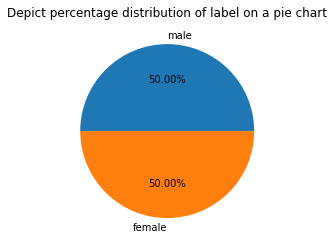

In [9]:
plt.pie(data.label.value_counts(),
        labels=data.label.value_counts().index,
       autopct='%1.2f%%',
       explode=[0,0])     #autopct is for percentage in piechart
plt.title('Depict percentage distribution of label on a pie chart')

plt.show()

In [10]:
data['label'].value_counts()           # Prints the count of different classes in 'label'

male      1584
female    1584
Name: label, dtype: int64

In [11]:
#Label encoder

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['label']=le.fit_transform(data.label)

In [13]:
data.label

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int64

In [14]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [15]:
 x=data.iloc[:,:-1].values
 

In [16]:
x.shape

(3168, 20)

In [17]:
y=data.label

In [18]:
y.head

<bound method NDFrame.head of 0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int64>

In [19]:
#Considering all the features as independent feature and label as dependent feature,split the dataset training and testing data with test size=20%

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [21]:
x_train.shape

(2534, 20)

In [22]:
x_test.shape

(634, 20)

In [23]:
y_train.shape

(2534,)

In [24]:
y_test.shape

(634,)

In [25]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)


[[301  10]
 [ 12 311]]


0.9652996845425867

In [27]:
decisiontree_train_predictions = classifier.predict(x_train)

In [28]:
print("Decisiontree Classification Report")
print(classification_report(y_train, decisiontree_train_predictions))

Decisiontree Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1273
           1       1.00      1.00      1.00      1261

    accuracy                           1.00      2534
   macro avg       1.00      1.00      1.00      2534
weighted avg       1.00      1.00      1.00      2534



In [29]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier1=RandomForestClassifier(n_estimators=2,criterion='entropy',random_state=0)
classifier1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=2, random_state=0)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=classifier1.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[307   4]
 [ 16 307]]


0.9684542586750788

In [31]:
randomforest_train_predictions = classifier1.predict(x_train)

In [32]:
print("randomforest Classification Report")
print(classification_report(y_train, randomforest_train_predictions))

randomforest Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1273
           1       1.00      0.98      0.99      1261

    accuracy                           0.99      2534
   macro avg       0.99      0.99      0.99      2534
weighted avg       0.99      0.99      0.99      2534



In [33]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
classifier2=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier2.fit(x_train,y_train)

KNeighborsClassifier()

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=classifier2.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)


[[212  99]
 [ 77 246]]


0.722397476340694

In [35]:
knn_train_predictions = classifier2.predict(x_train)

In [36]:
print("knn Model Classification Report")
print(classification_report(y_train, knn_train_predictions))

knn Model Classification Report
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1273
           1       0.80      0.83      0.81      1261

    accuracy                           0.81      2534
   macro avg       0.81      0.81      0.81      2534
weighted avg       0.81      0.81      0.81      2534



In [37]:
#LogistiRegression
from sklearn.linear_model import LogisticRegression
classifier3 = LogisticRegression()
classifier3.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = classifier3.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)


[[258  53]
 [ 14 309]]


0.8943217665615142

In [39]:
logisticregression_train_predictions = classifier3.predict(x_train)

In [40]:
print("logisticregression Model Classification Report")
print(classification_report(y_train, logisticregression_train_predictions))

logisticregression Model Classification Report
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      1273
           1       0.86      0.97      0.91      1261

    accuracy                           0.91      2534
   macro avg       0.92      0.91      0.91      2534
weighted avg       0.92      0.91      0.91      2534



In [41]:
#Support Vector Machine(SVM) using kernel=linear
from sklearn.svm import SVC 
classifier5=SVC(kernel='linear',random_state=0)
classifier5.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=classifier5.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[265  46]
 [  8 315]]


0.9148264984227129

In [43]:
svm_linear_train_predictions = classifier5.predict(x_train)

In [44]:
print("svm(linear) Model Classification Report")
print(classification_report(y_train, svm_linear_train_predictions))

svm(linear) Model Classification Report
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1273
           1       0.88      0.98      0.93      1261

    accuracy                           0.92      2534
   macro avg       0.93      0.92      0.92      2534
weighted avg       0.93      0.92      0.92      2534



In [45]:
#Support vector Machine(SVM) using kerne=rbf
from sklearn.svm import SVC 
classifier5=SVC(kernel='rbf',random_state=0)
classifier5.fit(x_train,y_train)

SVC(random_state=0)

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=classifier5.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[185 126]
 [ 75 248]]


0.6829652996845426

In [47]:
svm_rbf_train_predictions = classifier5.predict(x_train)

In [48]:
print("svm(rbf) Model Classification Report")
print(classification_report(y_train, svm_rbf_train_predictions))


svm(rbf) Model Classification Report
              precision    recall  f1-score   support

           0       0.72      0.58      0.64      1273
           1       0.65      0.77      0.70      1261

    accuracy                           0.68      2534
   macro avg       0.68      0.68      0.67      2534
weighted avg       0.68      0.68      0.67      2534

